# An example of Mars map using MKID_Data_Analysis_pipeline

---

In [28]:
import matplotlib.pyplot as plt # to be removed later.
import numpy.ma as ma
import numpy as np
from astropy import wcs


import data_reduction as dr
import image_synthesis as im

In [2]:
bc = dr.BinaryConvert()  # Call the object

Welcome!
Start by defining a path to the folder with the MKID readout data using select_files() method


In [49]:
mkid_files = bc.select_files() # Select the MKID readout files
# bc.save_fsp_pickle(mkid_files, "Mars_0601") # to average and save the fsp files to a single binary file.

In [3]:
data = bc.load_pickle("Mars_0601.pickle")

In [6]:
#### To check which pixels are good #####
# for i in range(len(data)):
#     bc.plot(data, i+1)

In [4]:
exclude = [48, 71, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 89, 90, 91, 92, 93, 94, 95, 98, 99]
bc.pixels_to_exclude(exclude) # to exclude these pixels from further calculations.

In [ ]:
freq = bc.identify_frequencies(data, 4000, exclude=True, plot=False, save_file=True)

In [5]:
clipped = bc.clip(data, 16 * 255, -16 * 160) # clip for decorrelation

In [6]:
jump_removed = bc.changepoint_remove(clipped, 1000, 17173)

In [7]:
mean_sub = bc.mean_center(clipped)

78


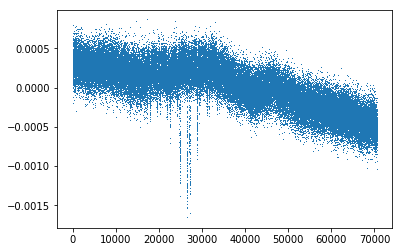

In [8]:
print(len(mean_sub))  # Important, use only the good and mean subtracted data.
plt.plot(mean_sub[2], ',')
plt.show()

In [9]:
# PCA decorrelation
res_pca = bc.pca_decor(mean_sub, n_components=3)

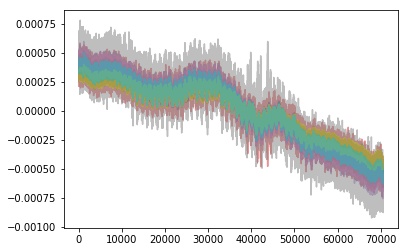

In [10]:
for i in range(10):
    plt.plot(res_pca[i][:, 1], alpha = 0.5)

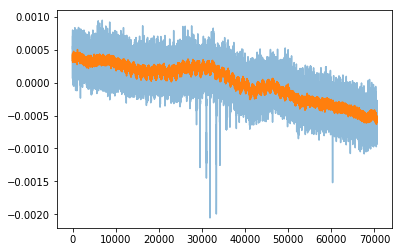

In [11]:
result_pca = res_pca # To create a backup for the first PCA

pix = 1
plt.plot(result_pca[pix][:,2], alpha=0.5)
plt.plot(result_pca[pix][:,1])
plt.show()

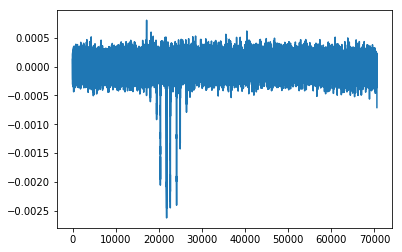

In [12]:
plt.plot(result_pca[0][:,0])
plt.show()

In [13]:
flat = bc.flatten(res_pca, 0)
mask = bc.get_sigmaclipped_mask(flat, avg_points=32, sigma=4, maxiters=4, axis=1)

(78, 70565)


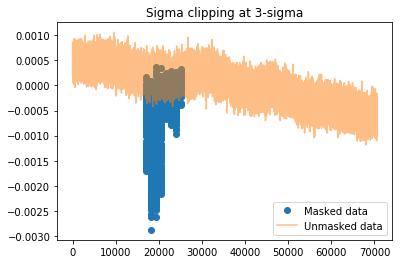

In [14]:
# ----------- TO GET THE SIGMA CLIPPED MASK PLOT --------------------
pix = 4
# plt.plot(running_avged[pix])
plt.plot(ma.masked_array(mean_sub[pix], ~mask[pix]), 'o', label='Masked data')
plt.plot(ma.masked_array(mean_sub[pix], mask[pix]), label='Unmasked data', alpha = 0.5)
plt.legend()
plt.title('Sigma clipping at 3-sigma')
plt.show()

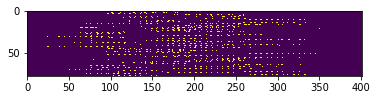

In [15]:
# -------------------------------------------------------------------

chunk_matrix = bc.make_chunk_matrix(mask, num_chunks=400)

plt.imshow(chunk_matrix)
# plt.colorbar()
plt.show()

In [16]:
# ---------  CHUNK PCA METHOD CHECKING ------------------------------

final = bc.chunkpca_decor(mask, chunk_matrix, mean_sub)

chunk 0 pool data length is (78, 176)
chunk 1 pool data length is (78, 176)
chunk 2 pool data length is (78, 176)
chunk 3 pool data length is (78, 176)
chunk 4 pool data length is (78, 176)
chunk 5 pool data length is (78, 176)
chunk 6 pool data length is (78, 176)
chunk 7 pool data length is (78, 176)
chunk 8 pool data length is (78, 176)
chunk 9 pool data length is (78, 176)
chunk 10 pool data length is (78, 176)
chunk 11 pool data length is (78, 176)
chunk 12 pool data length is (77, 176)
chunk 13 pool data length is (78, 176)
chunk 14 pool data length is (78, 176)
chunk 15 pool data length is (78, 176)
chunk 16 pool data length is (78, 176)
chunk 17 pool data length is (77, 176)
chunk 18 pool data length is (77, 176)
chunk 19 pool data length is (78, 176)
chunk 20 pool data length is (78, 176)
chunk 21 pool data length is (78, 176)
chunk 22 pool data length is (78, 176)
chunk 23 pool data length is (78, 176)
chunk 24 pool data length is (76, 176)
chunk 25 pool data length is (76, 1

chunk 209 pool data length is (73, 176)
chunk 210 pool data length is (78, 176)
chunk 211 pool data length is (78, 176)
chunk 212 pool data length is (78, 176)
chunk 213 pool data length is (71, 176)
chunk 214 pool data length is (61, 176)
chunk 215 pool data length is (65, 176)
chunk 216 pool data length is (68, 176)
chunk 217 pool data length is (78, 176)
chunk 218 pool data length is (78, 176)
chunk 219 pool data length is (70, 176)
chunk 220 pool data length is (64, 176)
chunk 221 pool data length is (60, 176)
chunk 222 pool data length is (68, 176)
chunk 223 pool data length is (78, 176)
chunk 224 pool data length is (78, 176)
chunk 225 pool data length is (78, 176)
chunk 226 pool data length is (72, 176)
chunk 227 pool data length is (62, 176)
chunk 228 pool data length is (63, 176)
chunk 229 pool data length is (71, 176)
chunk 230 pool data length is (77, 176)
chunk 231 pool data length is (78, 176)
chunk 232 pool data length is (73, 176)
chunk 233 pool data length is (65, 176)


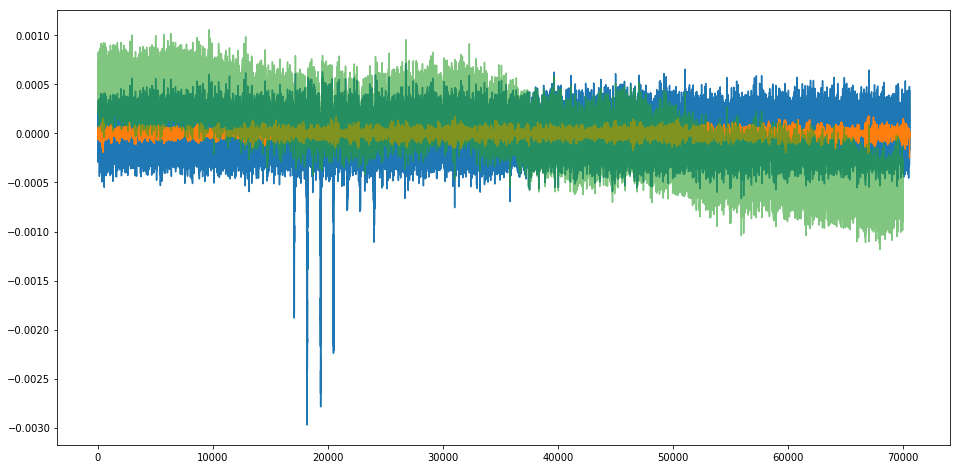

In [17]:
plt.rcParams['figure.figsize'] = [16, 8]
N = 32
pix = 4
plt.plot(final[pix][:,2])# - np.mean(final[pix][:,0]))
plt.plot(final[pix][:,1])
plt.plot(ma.masked_array(mean_sub[pix][(0):(70000)], mask[pix][(0):(70000)]), alpha=0.6)
plt.show()

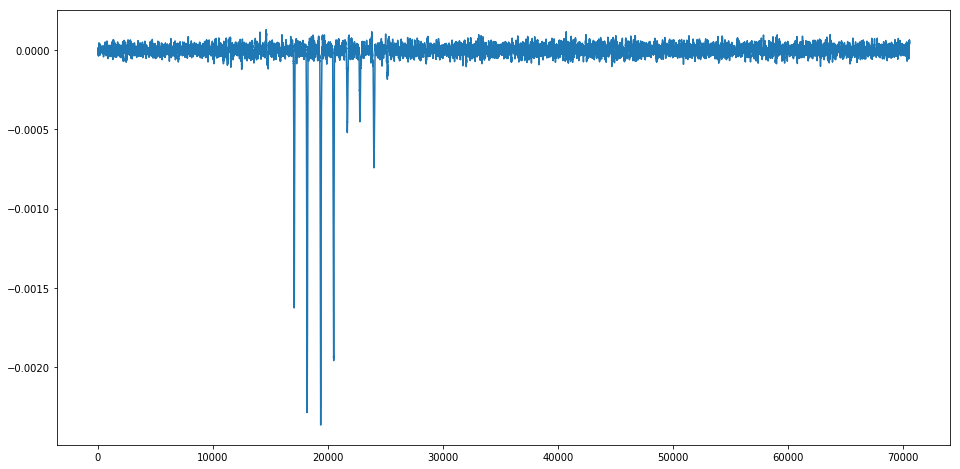

In [18]:
plt.plot(np.convolve(final[pix][:,0], np.ones((N,))/N, mode='same'))
plt.show()

In [33]:
final_flat = bc.flatten(final, 0)
bc.save_as_pickle(final_flat, "final_flat")

File final_flat has been created successfully!


In [19]:
cleaned = bc.load_pickle("final_flat.pickle")

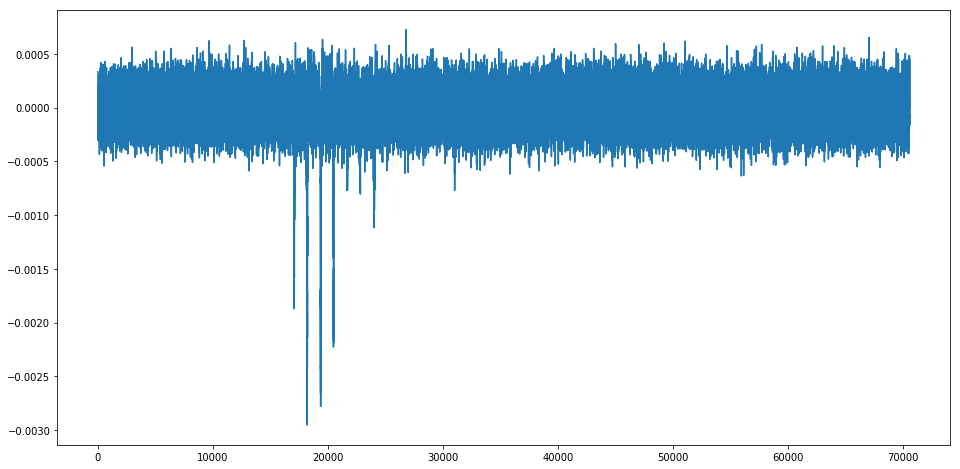

In [20]:
plt.plot(cleaned[pix], )
plt.show()

In [21]:
freq = bc.load_frequency()
pix_bright = bc.find_source_frequency(cleaned, minimaorder=4000)

[[1, -0.0026372234294058396], [2, -0.0021684471621221833], [3, -0.0018616492841185984], [4, -0.0019430007446175753], [5, -0.0029531113676394597], [6, -0.0023373022534928923], [7, -0.0019623629237043513], [8, -0.00268897828886737], [9, -0.0019287803163360426], [10, -0.0018908388929220123], [11, -0.0018523837677272155], [12, -0.0014095282630292932], [13, -0.0027387849259404226], [14, -0.0031775599212520577], [15, -0.0028019773748068737], [16, -0.0022006755100400853], [17, -0.0034828830544996266], [18, -0.001575528942339588], [19, -0.0024102560059822043], [20, -0.0023074544553575473], [21, -0.0026055041065718215], [22, -0.0023319857665975077], [23, -0.0018851034258171122], [24, -0.0023000383229150726], [25, -0.003123519820380317], [26, -0.0030904113706003962], [27, -0.0025105212256075564], [28, -0.0025030921926840486], [29, -0.0016312957745211003], [30, -0.0026714259290539274], [31, -0.0017806425414895156], [32, -0.002148705182486426], [33, -0.0032017379415476286], [34, -0.002585864015407

In [25]:
mkids_used = bc.mkids_used()

In [26]:
path_to_data = '/home/pranshu/Downloads/Data/rNROq_20180522093543_3600.MKID/data/'

In [31]:
settings = {
    'path': '/home/pranshu/git/Data_handling/',
    'filename': "rNROq_20180522093543_3600.MKID001.f0o8w5_0_29061.avrn8.txt",
    'position_log': "20180601054644",
    'mkids_to_exclude': exclude,
    'map_type': 'skymap', # 'skymap' or 'beammap'
    'mkids_end': 101,
    'beamsize_fwhm': 16, # In arcsecs.     (Default: 16 ")
    'kernelsize_fwhm': 4, # In arcsecs.
    'save_directory': "/home/pranshu/Downloads/Data/rNROq_20180522093543_3600.MKID/data/",
    'scan_size': [4, 4],#'auto', #[4, 4], # auto option is there. ----can be explicitely specified as [2, 2] for 2'X2' scan.
    #This is exclusively for Temperature callibratio using chopper-wheel method
    'chopper_wheel_frequency_table': 'frequencies.txt', # specify None value if not being used
    'Process' : 'beam_center_and_size', # 'combined_map'
    'position_crop':[64*64, -5*64], #The numbers are the beginning and end of the manual crop
    'intensity_offset': -456, #(-12*64)#(19*5)+1 #The intensity offset value to position the peaks correctly.212-v-347
    'show_scatter_plot': False, #scatter plot with the selected area
    'mkids_used': mkids_used,
    'plot_type': 'tmb', # 'ta_star', 'freq_shift', tmb
    'return_type': 'beamcenter'
}

In [32]:
beam = im.BeamCharcteristics()

In [33]:
# ------------------- fIND bEAM SIZE ---------------------
# beamsize = []
# for i in range(len(cleaned)):
#     world_coord = beam.work_fits(data = (cleaned[i]), settings=settings)
#     beamsize.append([mkids_used[i], world_coord])
# beamsize = np.array(beamsize)
# np.savetxt('beamsize.txt', beamsize)
# ----------------------------------------------------------------

[4, 4] crop1
11485 73504
('Position data points imported:', 73504)
('Position data points imported:', 69088)
[ 1.20437192e-04 -6.58437312e-05  7.75522145e-05 ...  7.70064382e-05
 -2.64124938e-04 -2.50700889e-05]
('Intensity data points imported:', 69088)


/home/pranshu/git/MKID_Data_Analysis_Pipeline/image_synthesis.py:303: RuntimeWarning: invalid value encountered in true_divide
  cygrid_cube = gridder.get_datacube().squeeze()
/home/pranshu/git/MKID_Data_Analysis_Pipeline/image_synthesis.py:309: RuntimeWarning: invalid value encountered in log10
  cygrid_cube = 10 * np.log10(cygrid_cube)  # dB conversion


BEAM CENTER :  [[62.634414878075, -27.76149818524153, 20.817080503941703]]
[4, 4] crop1
11485 73504
('Position data points imported:', 73504)
('Position data points imported:', 69088)
[ 1.35783939e-04  2.67660126e-04 -7.10522989e-06 ... -1.66235424e-04
 -1.29967353e-04  1.15022554e-04]
('Intensity data points imported:', 69088)
BEAM CENTER :  [[46.950032119868624, 11.420209034255084, 16.50298508708343]]
[4, 4] crop1
11485 73504
('Position data points imported:', 73504)
('Position data points imported:', 69088)
[ 2.98824360e-04  2.21182136e-04  2.39212761e-04 ... -1.97717831e-04
  5.73589318e-05 -3.37940679e-05]
('Intensity data points imported:', 69088)
BEAM CENTER :  [[88.6365248062474, 6.672991199005845, 15.660900207948284]]
[4, 4] crop1
11485 73504
('Position data points imported:', 73504)
('Position data points imported:', 69088)
[ 3.77695333e-04  4.20729956e-05 -1.54472912e-04 ... -3.63777666e-05
  1.22000914e-04 -1.27249045e-04]
('Intensity data points imported:', 69088)
BEAM CEN

BEAM CENTER :  [[56.57015555780617, 59.188109246677584, 27.805698543035312]]
[4, 4] crop1
11485 73504
('Position data points imported:', 73504)
('Position data points imported:', 69088)
[ 3.14560022e-05 -1.25643137e-04 -3.95216083e-04 ... -1.07020613e-04
  2.88121065e-05 -6.01637761e-05]
('Intensity data points imported:', 69088)
BEAM CENTER :  [[30.958754641469795, -70.43413055814447, 16.570898543775055]]
[4, 4] crop1
11485 73504
('Position data points imported:', 73504)
('Position data points imported:', 69088)
[-1.53490262e-04 -1.19472725e-04 -2.36332545e-04 ... -8.84494395e-05
  1.64914753e-04 -4.05425927e-05]
('Intensity data points imported:', 69088)
BEAM CENTER :  [[92.03502831361448, -43.49057820196542, 21.783386528098823]]
[4, 4] crop1
11485 73504
('Position data points imported:', 73504)
('Position data points imported:', 69088)
[-3.00609841e-04  1.90211402e-04 -6.43148813e-05 ...  1.03004113e-04
  2.78944346e-04 -5.63307994e-05]
('Intensity data points imported:', 69088)
BEA

BEAM CENTER :  [[42.01512421468257, -0.20107538849873774, 19.73546744322838]]
[4, 4] crop1
11485 73504
('Position data points imported:', 73504)
('Position data points imported:', 69088)
[-3.81172203e-04  1.45037942e-04 -2.06212709e-04 ... -5.10243997e-05
  2.16990952e-04  7.30630232e-06]
('Intensity data points imported:', 69088)
BEAM CENTER :  [[-46.50711541379214, 55.08174828531051, 20.03887465018272]]
[4, 4] crop1
11485 73504
('Position data points imported:', 73504)
('Position data points imported:', 69088)
[-2.95046099e-04  1.64367414e-04  1.59876754e-04 ...  2.39412293e-04
 -6.91563393e-04  1.94376558e-05]
('Intensity data points imported:', 69088)
BEAM CENTER :  [[24.515001563039885, -61.83942214961193, 15.750589880771678]]
[4, 4] crop1
11485 73504
('Position data points imported:', 73504)
('Position data points imported:', 69088)
[-2.51962270e-04  3.02964761e-04 -3.90985752e-04 ... -4.06467012e-04
  2.18749353e-04  7.44048532e-05]
('Intensity data points imported:', 69088)
BEA

BEAM CENTER :  [[-1.7527677230622, -73.49799530374045, 1.9365417519758514]]
[4, 4] crop1
11485 73504
('Position data points imported:', 73504)
('Position data points imported:', 69088)
[-3.42244515e-04 -2.10191876e-04  2.55869487e-04 ... -3.70488818e-05
 -2.03691049e-04  8.52845949e-06]
('Intensity data points imported:', 69088)
BEAM CENTER :  [[-10.481419220681884, 74.4055102076258, 20.644687650425624]]
[4, 4] crop1
11485 73504
('Position data points imported:', 73504)
('Position data points imported:', 69088)
[-0.00017696 -0.00023106  0.00014388 ...  0.00035504  0.00017707
  0.00013645]
('Intensity data points imported:', 69088)
BEAM CENTER :  [[28.883958132485795, -43.432718049640386, 18.208740009183906]]


In [34]:
beamsize = np.loadtxt('beamsize.txt')

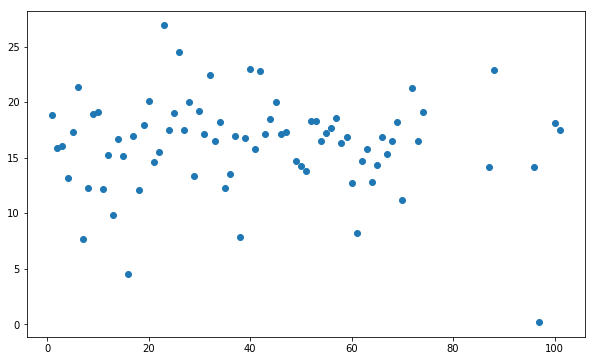

In [37]:
plt.plot(beamsize[:, 0], beamsize[:, 1], 'o')
plt.show()


In [38]:
# selecting the good beamsizes

beamaverage = np.mean(beamsize[:, 1])

new_sizes = []
threshhold = 3
for i in range(len(beamsize)):
    if beamsize[i][1] < beamaverage + threshhold:
        if beamsize[i][1] > beamaverage - threshhold:
            new_sizes.append([beamsize[i][0], beamsize[i][1]])
print(len(new_sizes))
new_sizes = np.array(new_sizes)

53


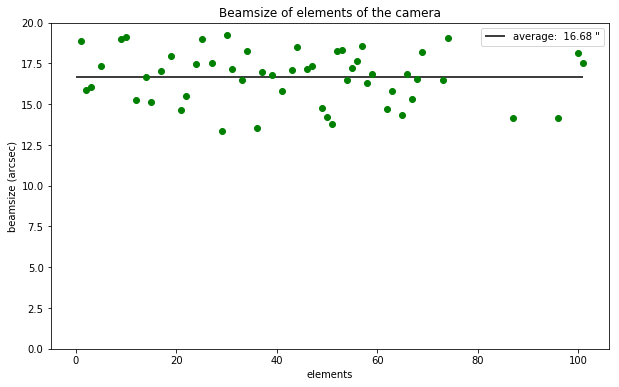

In [39]:
plt.plot(new_sizes[:, 0], new_sizes[:, 1], 'o', c='green')
plt.hlines(np.mean(new_sizes[:, 1]), 0, np.amax(new_sizes[:, 0]), label='average: {: .2f} \"' .format(np.mean(new_sizes[:, 1])))
plt.title('Beamsize of elements of the camera')
plt.xlabel('elements')
plt.ylabel('beamsize (arcsec)')
plt.ylim(0, 20)
plt.legend()
plt.show()

In [41]:
#getting the good elements
filtered_elements = []
for i in range(len(beamsize)):
    if beamsize[i][0] not in new_sizes[:, 0]:
        filtered_elements.append(beamsize[i][0])

print(filtered_elements)

[4.0, 6.0, 7.0, 8.0, 11.0, 13.0, 16.0, 18.0, 20.0, 23.0, 26.0, 28.0, 32.0, 35.0, 38.0, 40.0, 42.0, 45.0, 60.0, 61.0, 64.0, 70.0, 72.0, 88.0, 97.0]


In [42]:
freq = bc.load_frequency()
pix_bright = np.loadtxt('pix_bright.txt')

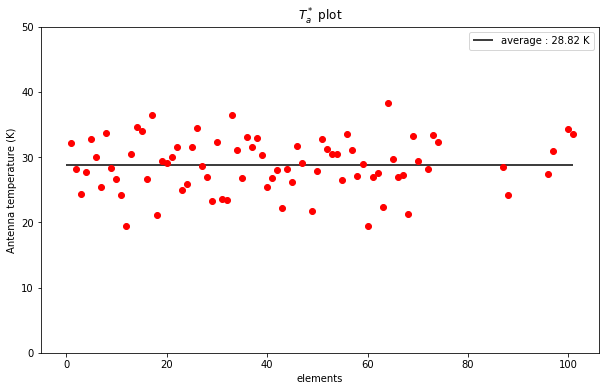

In [45]:
antenna_temp = bc.antenna_temperature(freq, pix_bright, 282, exclude=[], plot=True)
# print(antenna_temp)

78
78


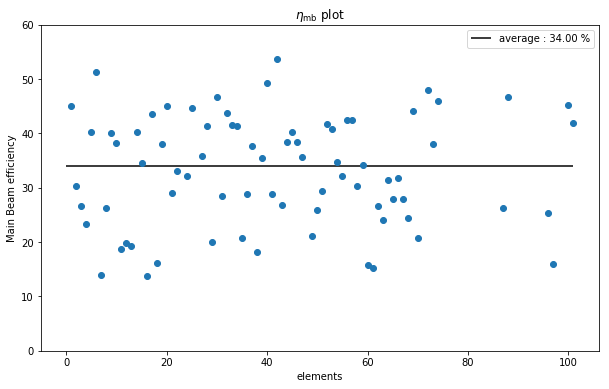

In [46]:
eta_mb = bc.get_main_beam_efficiency(antenna_temp, 1e+11, 195, 15.3, 15.3, beamsize, plot=True)


[4, 4] crop1
11485 73504
('Position data points imported:', 73504)
69088
('Position data points imported:', 69088)
[ 1.20437192e-04 -6.58437312e-05  7.75522145e-05 ...  7.70064382e-05
 -2.64124938e-04 -2.50700889e-05]
('Intensity data points imported:', 69088)


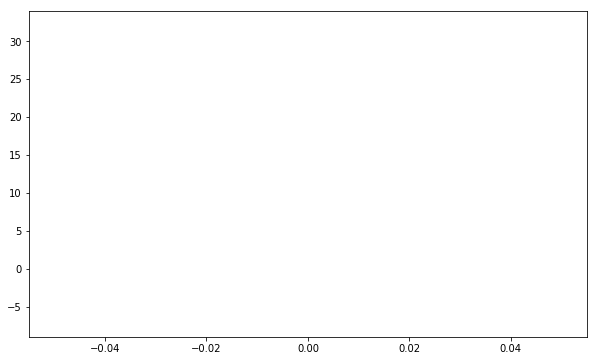

/home/pranshu/git/MKID_Data_Analysis_Pipeline/image_synthesis.py:541: RuntimeWarning: divide by zero encountered in true_divide
  cygrid_cube = gridder.get_datacube().squeeze()
/home/pranshu/git/MKID_Data_Analysis_Pipeline/image_synthesis.py:541: RuntimeWarning: invalid value encountered in true_divide
  cygrid_cube = gridder.get_datacube().squeeze()


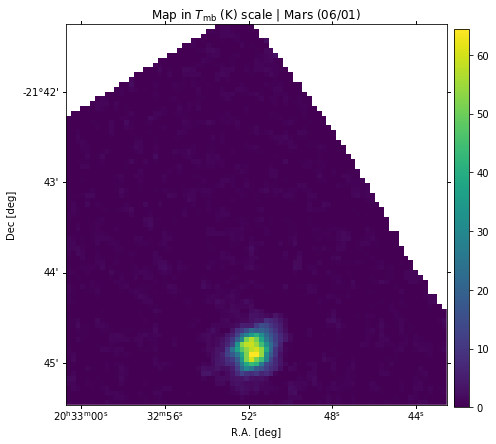

In [48]:
marsmap = im.CompositeMKIDmapper()

offsets = np.loadtxt("RA_DEC_center_offsets.txt") #"center_offsets.txt" or "RA_DEC_center_offsets.txt"
cygrid_cube, target_header = marsmap.work_fits(data = cleaned, frequencies=freq, eta_mb=eta_mb, mkid_ids=mkids_used, offsets=offsets, settings=settings, mkid_end=1, roomtemp=282)
target_wcs = wcs.WCS(target_header)


axis_extent = 110

xaxmin = -axis_extent
xaxmax = axis_extent
yaxmin = -axis_extent
yaxmax = axis_extent

# print yaxmax
# print yaxmin


##########################################################

wmcut = target_wcs[40:130, 40:130]
datacut = cygrid_cube[40:130, 40:130]

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection=wmcut.celestial)
cax = fig.add_axes([0.905, 0.12, 0.03, 0.75])
im = ax.imshow(
    datacut,
    origin='lower', interpolation='nearest', vmin = 0
    )#, cmap='gist_ncar'
lon, lat = ax.coords
lon.set_axislabel('R.A. [deg]')
lat.set_axislabel('Dec [deg]')
ax.set_title('Map in $T_{\mathrm{mb}}$ (K) scale | Mars (06/01)')
fig.colorbar(im, cax=cax, orientation='vertical')
# CS = plt.contour(cygrid_db, levels, colors=('white', 'r', 'green', (1, 1, 0), '#afeeee', '0.5'))#, extent=extent)
# plt.savefig('./results/Mars_RA_DEC_projection_zoomed.pdf')
plt.show()